In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mist-csv/fashion-mnist_train.csv


In [3]:
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv("/kaggle/input/mist-csv/fashion-mnist_train.csv")

In [6]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
a=data.iloc[2,1:].values

In [26]:
a=a.reshape(28,28).astype("uint8")

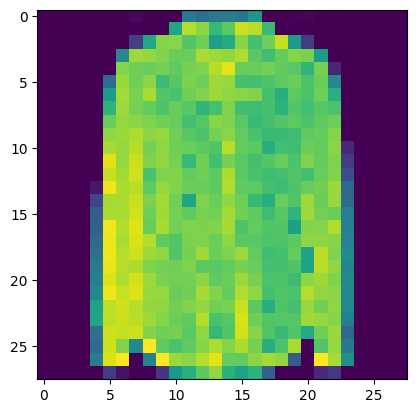

In [27]:
plt.imshow(a)

In [29]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [31]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20379,0,0,0,0,0,0,0,0,0,3,...,4,3,0,70,162,157,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,155,25,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,53,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,1,1,1,...,3,0,42,176,126,106,0,0,0,0


In [32]:
y_train.head()


20379    4
53032    5
27005    7
30510    1
508      4
Name: label, dtype: int64

In [33]:
rf=RandomForestClassifier(n_estimators=100)

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
pred=rf.predict(x_test)
pred

array([4, 4, 2, ..., 1, 4, 7])

In [39]:
s=y_test.values
count=0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1

In [40]:
count

10568

In [41]:
len(pred)

12000

In [42]:
10568/12000

0.8806666666666667